In [1]:
%matplotlib inline
from os import listdir
from os.path import isfile, join
import numpy as np
from glob import glob
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib
import statsmodels.stats.multitest as smt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [7]:
## Read samples location info
dir_path = '/Users/osipova/Documents/LabDocs/Leatherback_popgen/'
file_name = 'dc_ALL_rounds_info.tsv'
file_data = glob(dir_path + file_name)[0]
INFO = pd.read_csv(file_data, sep='\t')[['Sample_ID', 'country', 'year', 'post_dupe_depth']]
INFO.rename(columns={'Sample_ID':'sample', 
                     'country':'country', 
                     'year':'year', 
                     'post_dupe_depth':'depth'}, inplace=True)

In [8]:
countries_order = ['Indonesia', 'Solomon_Islands', 'Malaysia', 'Papua_New_Guinea', 'Mexico', 'Virgin_Islands',
                   'French_Guiana', 'Suriname', 'Costa_Rica', 'Ghana', 'Gabon', 'South_Africa']

## 1. Plot Admixture results

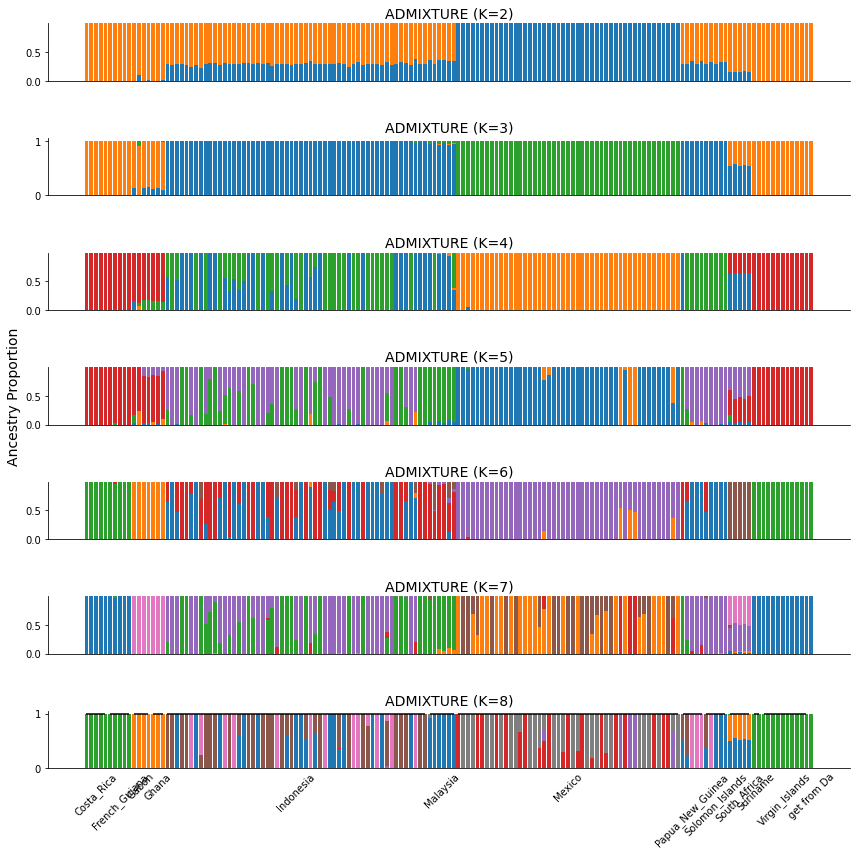

In [91]:
dir_path = '/Users/osipova/Documents/LabDocs/Leatherback_popgen/'
out_dir = "admixture_out/"
k_values = range(2, 9)

fig, axes = plt.subplots(len(k_values), 1, figsize=(12, 12))

for i in range(len(k_values)):
    k = k_values[i]
    
    # Load Q matrix
    file_name = "named.turtles_ld_pruned.{}.Q".format(k)
    file_data = glob(dir_path + out_dir + file_name)[0]
    q_matrix = pd.read_csv(file_data, sep="\t", names=['sample'] + list(range(1, k+1)), index_col=False)
    df_q = pd.merge(q_matrix, INFO, on='sample')
    df_q.sort_values('country', inplace=True,ignore_index=True)
    ax = axes[i]
    
    # Stacked bar plot for each individual
    bottom = pd.Series(0, index=df_q.index)
    for cluster in range(1, k+1):
        ax.bar(df_q.index, 
               df_q[cluster], 
               bottom=bottom)
        bottom += df_q[cluster]
    
    ax.set_title(f"ADMIXTURE (K={k})", fontsize=14)
    if i == 3:
        ax.set_ylabel("Ancestry Proportion", fontsize=14)
    ax.set_xticks([])


    # Calculate midpoints for country labels
    countries = df_q['country'].unique()
    positions = []
    labels = []
    line_ranges = []

    for country in countries:
        subset = df_q[df_q['country'] == country]
        midpoint = (subset.index[0] + subset.index[-1]) / 2
        positions.append(midpoint)
        labels.append(country)
        line_ranges.append((subset.index[0], subset.index[-1]))

    # Add horizontal lines above the plot
    if i == len
    line_y = 1.1
    for start, end in line_ranges:
        ax.hlines(y=line_y, xmin=start, xmax=end, color='black', linewidth=1.5)

    # Add country labels
    for pos, label in zip(positions, labels):
        ax.text(pos, -0.05, label, ha='center', va='top', rotation=45)
    ax.set_ylim(-0.15, 1.05)

    
sns.despine(fig=None, ax=None, left=False, bottom=False, offset=None, trim=False)
fig.tight_layout()

In [83]:
df_q

,sample,1,2,3,4,5,6,7,8,country,year,depth
0,dc_33129_bb_noq,0.000010,0.00001,0.999930,0.000010,0.00001,0.00001,0.000010,0.00001,Costa_Rica,NaN,8.23
1,dc_32482_bb_noq,0.000010,0.00001,0.999930,0.000010,0.00001,0.00001,0.000010,0.00001,Costa_Rica,2001,11.79
2,dc_32484_bb_noq,0.000010,0.00001,0.999930,0.000010,0.00001,0.00001,0.000010,0.00001,Costa_Rica,2001,14.37
3,dc_33126_bb_noq,0.000010,0.00001,0.999930,0.000010,0.00001,0.00001,0.000010,0.00001,Costa_Rica,NaN,15.24
4,dc_33128_bb_noq,0.000013,0.00001,0.999875,0.000062,0.00001,0.00001,0.000010,0.00001,Costa_Rica,2003,8.57
...,...,...,...,...,...,...,...,...,...,...,...,...
148,dc_109793_bb_noq,0.000012,0.00001,0.999928,0.000010,0.00001,0.00001,0.000010,0.00001,Virgin_Islands,2005,11.57
149,dc_109803_bb_noq,0.000010,0.00001,0.999930,0.000010,0.00001,0.00001,0.000010,0.00001,Virgin_Islands,2006,15.79
150,dc_109873_bb_noq,0.000010,0.00001,0.999930,0.000010,0.00001,0.00001,0.000010,0.00001,Virgin_Islands,2008,26.91
151,dc_78623_bb_noq,0.000010,0.00001,0.999930,0.000010,0.00001,0.00001,0.000010,0.00001,Virgin_Islands,2012,13.94
